<h1 style="font-size: 30px; color:turquoise;">Convolutional Autoencoder (CAE) on the CIFAR10-Dataset using Tensorflow</h1>
<h2 style="font-size: 20px;">Authors: Bruno Figura & Daniel Labuda, ML II Projektarbeit Gruppe 2, SoSe24</h2>
-----------------------------------------------------------------------------------------------------


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns

from keras.datasets import cifar10
import tensorflow as tf
from keras.models import Model
from keras import layers, models, Input
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

Training data shape:
 (50000, 32, 32, 3) 

Test data shape:
 (10000, 32, 32, 3) 

Training labels shape:
 (50000, 10) 

Test labels shape:
 (10000, 10)


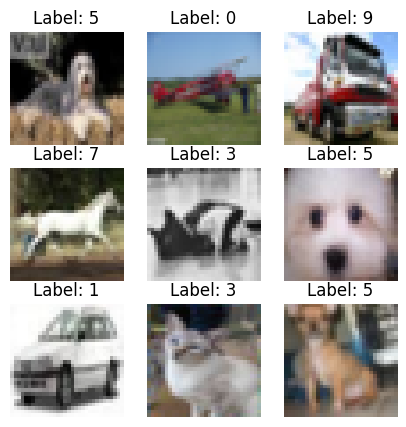

In [38]:
# Split the imported dataset into training and test data. Preprocess (reshape and normalize) the dataset. Print out the shapes of the resulting tensors.
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print("Training data shape:\n", train_data.shape, "\n")
print("Test data shape:\n", test_data.shape, "\n")
print("Training labels shape:\n", train_labels.shape, "\n")
print("Test labels shape:\n", test_labels.shape)

random_indices = np.random.choice(train_data.shape[0], 9, replace=False)
random_images = train_data[random_indices]

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(random_images[i])
    plt.title(f"Label: {np.argmax(train_labels[random_indices[i]])}")
    plt.axis('off')
plt.show()

In [35]:
# Encoder
input_img = Input(shape=(32, 32, 3))

# 1st convolution layer
x = layers.Conv2D(4, (5, 5), padding='same', activation='relu')(input_img)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

# 2nd convolution layer
x = layers.Conv2D(16, (5, 5), padding='same', activation='relu')(x)
encoded = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(16, (5, 5), padding='same', activation='relu')(encoded)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(4, (5, 5), padding='same', activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(1, (5, 5), padding='same', activation='sigmoid')(x)

# Autoencoder Model
autoencoder = Model(input_img, decoded)

# Define CNN Classifier on top of Encoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(256, (2, 2), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (2, 2), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)

# Full model including classifier
full_model = Model(input_img, output)

autoencoder.summary()
full_model.summary()

Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 32, 32, 4)      │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 16, 16, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 16, 16, 16)     │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 8, 8, 16)       │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_28 (UpSampling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 16, 16, 4)      │         1,604 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_29 (UpSampling2D) │ (None, 32, 32, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 32, 32, 1)      │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,041 (39.22 KB)

 Trainable params: 10,041 (39.22 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 32, 32, 4)      │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 16, 16, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 16, 16, 16)     │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 8, 8, 128)      │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 4, 4, 256)      │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 4, 4, 512)      │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,629,962 (6.22 MB)

 Trainable params: 1,629,962 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_data, train_data, batch_size=128, epochs=100, validation_data=(test_data, test_data))

# Compile and train the full model
full_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
full_model.fit(train_data, train_labels, batch_size=128, epochs=100, validation_data=(test_data, test_labels))

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - loss: 0.5988 - val_loss: 0.5646
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 0.5629 - val_loss: 0.5615
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 0.5603 - val_loss: 0.5600
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.5592 - val_loss: 0.5592
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.5587 - val_loss: 0.5585
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.5575 - val_loss: 0.5580
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.5569 - val_loss: 0.5575
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 0.5564 - val_loss: 0.5579
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 0.5569 - val_loss: 0.5578
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 0.5561 - val_loss: 0.5567
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 0.5564 - val_loss: 0.5563
Epoch 12/100
391/39

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


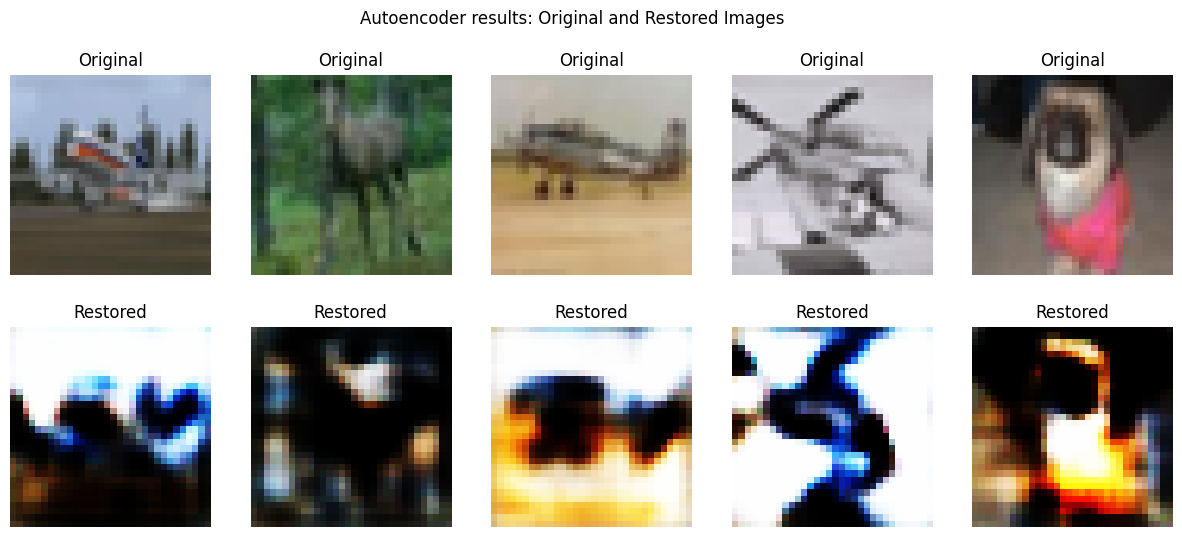

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


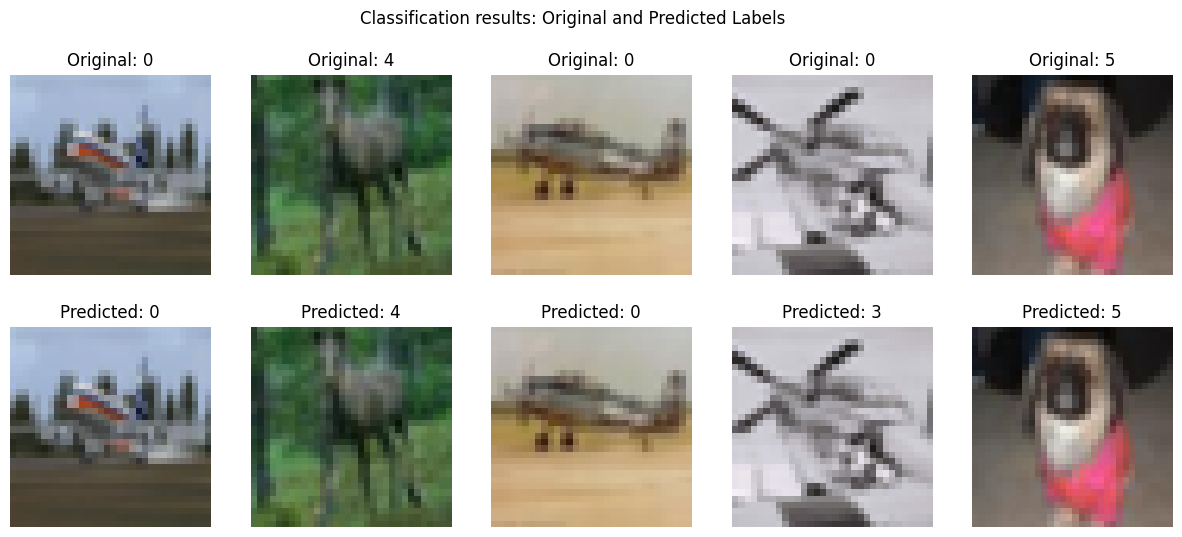

In [29]:
# Plot 5 random input-images to be ran through the CAE as well as the results
num_samples = test_data.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Get the restored images from the autoencoder
restored_imgs = autoencoder.predict(test_data)

# Create a 2x5 grid for displaying results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Autoencoder results: Original and Restored Images')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index])
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # Restored images
    axes[1, i].imshow(restored_imgs[random_index])
    axes[1, i].axis('off')
    axes[1, i].set_title('Restored')

plt.show()

# Display classification results
predictions = full_model.predict(test_data)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Classification results: Original and Predicted Labels')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original: {np.argmax(test_labels[random_index])}')

    # Predicted labels
    axes[1, i].imshow(test_data[random_index])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Predicted: {np.argmax(predictions[random_index])}')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


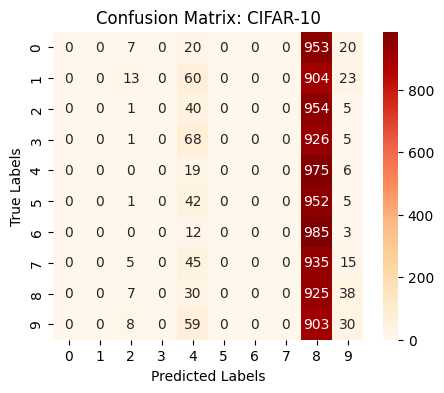

Classification Report:
               precision    recall  f1-score   support

           0      0.000     0.000     0.000      1000
           1      0.000     0.000     0.000      1000
           2      0.023     0.001     0.002      1000
           3      0.000     0.000     0.000      1000
           4      0.048     0.019     0.027      1000
           5      0.000     0.000     0.000      1000
           6      0.000     0.000     0.000      1000
           7      0.000     0.000     0.000      1000
           8      0.098     0.925     0.178      1000
           9      0.200     0.030     0.052      1000

    accuracy                          0.098     10000
   macro avg      0.037     0.098     0.026     10000
weighted avg      0.037     0.098     0.026     10000



c:\Users\labud\.conda\envs\TEST9\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\labud\.conda\envs\TEST9\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\labud\.conda\envs\TEST9\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Predict the labels for the test data
predicted_labels = np.argmax(full_model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: CIFAR-10')
plt.show()

# Print the classification report
report = classification_report(true_labels, predicted_labels, digits=3)
print('Classification Report:\n', report)